# Stock Prediction

*Apple*

In [70]:
%pylab inline
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 

from sklearn.preprocessing import MinMaxScaler 

from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout
from keras.callbacks import ReduceLROnPlateau

WINDOW = 30

Populating the interactive namespace from numpy and matplotlib


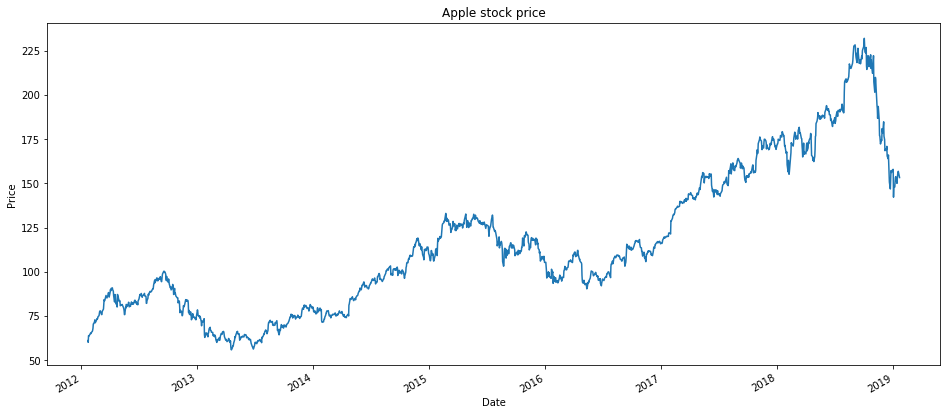

In [187]:
data = pd.read_csv('data/AAPL.csv', index_col=['Date'], parse_dates=['Date']) 

price = data.iloc[:, 4:5].values 

plt.figure(figsize(16,7))
plt.ylabel('Price')
plt.title('Apple stock price')

data['Close'].plot()
plt.show()

In [188]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-23,60.381428,61.207142,60.328571,61.058571,40.888649,76515600
2012-01-24,60.728573,60.728573,59.935715,60.058571,40.218994,136909500
2012-01-25,64.919998,64.921425,63.389999,63.808571,42.730225,239578500
2012-01-26,64.051430,64.112854,63.305714,63.518570,42.536026,80996300
2012-01-27,63.477142,64.068573,63.395714,63.897144,42.789543,74927300


In [189]:

scaler = MinMaxScaler(feature_range = (0, 1))
price_scaled = scaler.fit_transform(price) 

features = []  
labels = []  
for i in range(WINDOW, price.size):  
    features.append(price_scaled[i-WINDOW:i, 0])
    labels.append(price_scaled[i, 0])

features, labels = np.array(features), np.array(labels)  
features = np.reshape(features, (features.shape[0], features.shape[1], 1))  

In [190]:
labels

array([0.05500778, 0.05522315, 0.06088168, ..., 0.60531054, 0.61033559,
       0.59191051])

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [192]:
from keras.layers import Conv1D, Activation, GlobalMaxPool1D, Flatten, MaxPooling1D

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, input_shape=(30,1), activation='relu'))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [193]:
history = model.fit(X_train, Y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

#predictions = scaler.inverse_transform(predictions) 

Train on 927 samples, validate on 232 samples
Epoch 1/10
927/927 [==============================] - 1s 680us/step - loss: 0.0238 - mean_absolute_error: 0.1066 - val_loss: 0.0053 - val_mean_absolute_error: 0.0573
Epoch 2/10
927/927 [==============================] - 0s 98us/step - loss: 0.0034 - mean_absolute_error: 0.0414 - val_loss: 0.0015 - val_mean_absolute_error: 0.0266
Epoch 3/10
927/927 [==============================] - 0s 86us/step - loss: 0.0015 - mean_absolute_error: 0.0278 - val_loss: 0.0014 - val_mean_absolute_error: 0.0267
Epoch 4/10
927/927 [==============================] - 0s 82us/step - loss: 0.0012 - mean_absolute_error: 0.0248 - val_loss: 0.0015 - val_mean_absolute_error: 0.0265
Epoch 5/10
927/927 [==============================] - 0s 77us/step - loss: 0.0012 - mean_absolute_error: 0.0240 - val_loss: 0.0012 - val_mean_absolute_error: 0.0246
Epoch 6/10
927/927 [==============================] - 0s 75us/step - loss: 0.0011 - mean_absolute_error: 0.0230 - val_loss: 0.00

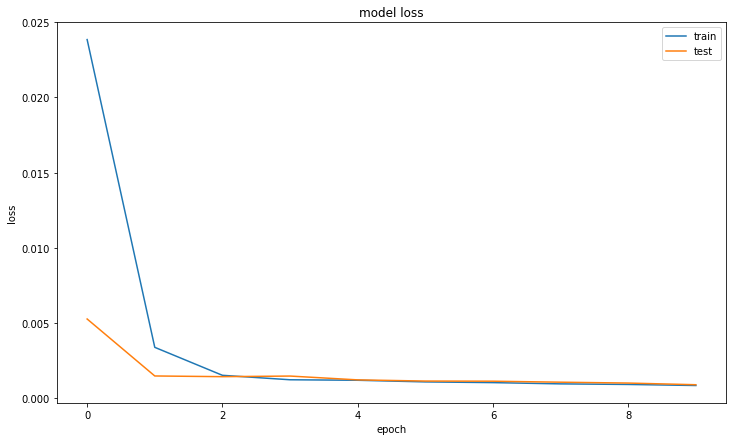

In [194]:
plt.figure(figsize=(12,7))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

In [195]:
scores = model.evaluate(X_test, Y_test)

572/572 [==============================] - 0s 52us/step


In [196]:
scores[1]

0.017678945872385603

In [197]:
pred = model.predict(X_test) 

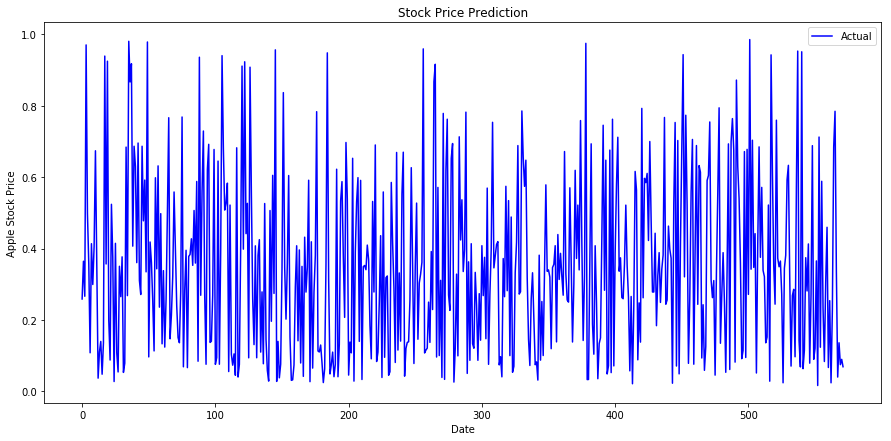

In [207]:
beg = data.index[0]
end = data.index[-1]
dt = pd.date_range(start=beg, end=end, freq='1d')

plt.figure(figsize=(15,7))  
plt.plot(Y_test, color='blue', label='Actual')  
#plt.plot(pred , color='red', label='Predicted')  
plt.title('Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Apple Stock Price')  
plt.legend(loc='best')
plt.show()  

In [208]:
data[-3:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-17,154.199997,157.660004,153.259995,155.860001,155.860001,29821200
2019-01-18,157.500000,157.880005,155.979996,156.820007,156.820007,33751000
2019-01-22,156.410004,156.729996,152.619995,153.300003,153.300003,30278100


In [209]:
price[-3:]

array([[155.860001],
       [156.820007],
       [153.300003]])

In [210]:
price_scaled[-3:]

array([[0.60531054],
       [0.61033559],
       [0.59191051]])

In [211]:
scaler.inverse_transform(price_scaled)[-3:]

array([[155.860001],
       [156.820007],
       [153.300003]])

In [213]:
Y_test[-3:]

array([0.07482818, 0.08963498, 0.0690089 ])

In [215]:
price_scaled[-3:]

array([], shape=(0, 1), dtype=float64)